### Getting Historical Data

In [13]:
import yfinance as yf

stock=input('enter a valid stock name : ').strip()
print('This only deals with stocks listed on NSE & NASDAQ \n')

def convert_stock_NS(stock_name):
    NSE_STOCK=f'{stock_name}.NS'
    return NSE_STOCK

ans=input('Is your stock listed on NSE (y/n) : ').strip().lower()
if ans=='y':
    stock=convert_stock_NS(stock)
    stock_data=yf.download(stock,period="5y")
else :
    stock_data=yf.download(stock,period="5y")    


This only deals with stocks listed on NSE & NASDAQ 



[*********************100%***********************]  1 of 1 completed


In [14]:
stock_ticker = yf.Ticker(stock)
info = stock_ticker.info
stock_name=info.get('shortName', 'N/A')

print(f'\n***************{stock_name}***************\n')


stock_data



***************Apple Inc.***************



Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-05-21,77.000023,77.981815,76.761863,77.439884,102688800
2020-05-22,77.495789,77.578414,76.635505,76.737568,81803200
2020-05-26,76.970863,78.795918,76.914967,78.616088,125522000
2020-05-27,77.306236,77.452048,76.086292,76.827499,112945200
2020-05-28,77.340263,78.601524,76.703559,76.980595,133560800
...,...,...,...,...,...
2025-05-15,211.449997,212.960007,209.539993,210.949997,45029500
2025-05-16,211.259995,212.570007,209.770004,212.360001,54737900


### Getting Live data

In [15]:
import yfinance as yf
import pandas as pd
pd.set_option('display.max_columns', None)

recent_data=yf.download(stock,period="3mo", interval='60m')  
print(f'\n***************{stock_name}***************\n')
recent_data

[*********************100%***********************]  1 of 1 completed


***************Apple Inc.***************



Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Datetime,,,,,
2025-02-21 19:30:00+00:00,245.800003,246.820007,245.390106,246.505005,0
2025-02-21 20:30:00+00:00,245.589996,246.089996,245.330002,245.815002,5597978
2025-02-24 14:30:00+00:00,247.850006,248.860001,244.589996,246.115005,13193734
2025-02-24 15:30:00+00:00,247.110199,247.954102,246.009995,247.850006,6815696
2025-02-24 16:30:00+00:00,247.794998,248.320007,247.119995,247.119995,3637316
...,...,...,...,...,...
2025-05-21 14:30:00+00:00,206.580002,207.039993,205.476196,205.850006,4273571
2025-05-21 15:30:00+00:00,205.639999,206.869995,205.520096,206.570007,3570453


### wrapping data & graphing

In [16]:
stock_data.columns = stock_data.columns.get_level_values(0)
recent_data.columns = recent_data.columns.get_level_values(0)

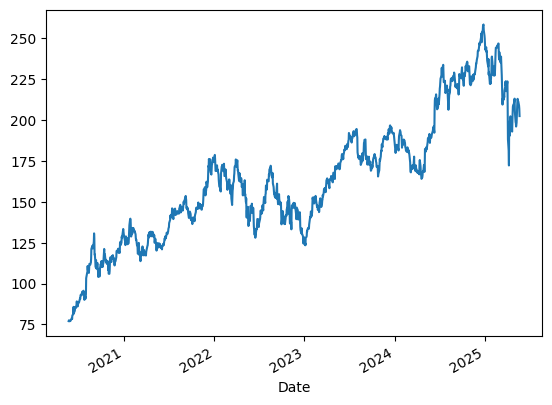

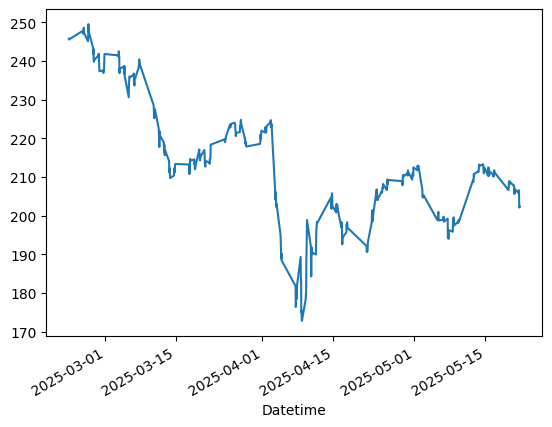

Price,close
Datetime,
2025-02-21 19:30:00+00:00,245.800003
2025-02-21 20:30:00+00:00,245.589996
2025-02-24 14:30:00+00:00,247.850006
2025-02-24 15:30:00+00:00,247.110199
2025-02-24 16:30:00+00:00,247.794998
...,...
2025-05-21 14:30:00+00:00,206.580002
2025-05-21 15:30:00+00:00,205.639999
2025-05-21 16:30:00+00:00,202.100006


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

stock_data['Close'].plot()
plt.show()

recent_data['Close'].plot()
plt.show()
pd.set_option('display.max_columns', None)

from stockstats import wrap
wrapped_data = wrap(recent_data)
wrapped_data.init_all()
#print(wrapped_data)
historical_data=wrapped_data[['close']] #,'trix','middle','vwma','high','low','volume','ppo'
historical_data

### News Sentiment Analysis

In [18]:
from newsapi import NewsApiClient

In [19]:
api = NewsApiClient(api_key='1727fdcffd8b4c5e936a02fa17ebb381')

In [20]:
data = api.get_everything(q=f'{stock_name}')
articles = data['articles'][:5]

for article in articles:
    print(article['title'])  # or article['description'], etc.


Apple Outlines WWDC 2025 Labs and Community Events
Apple Prepares for WWDC 2025 With Developer App Update
Apple Might Be Forced to Bring Fortnite Back to U.S. App Store
Developers Sue Apple for Failing to Comply With In-App Payments Order
Apple says searches are shrinking because people are using AI instead. Now Google's stock is tanking.


In [21]:
from langdetect import detect, DetectorFactory
english_articles = []
for article in data['articles']:
    try:
        lang = detect(article['title'] if article['title'] else article['description'])
        if lang == 'en':
            english_articles.append(article)
    except:
        continue
english_articles[:5]

[{'source': {'id': None, 'name': 'MacRumors'},
  'author': 'Joe Rossignol',
  'title': 'Apple Outlines WWDC 2025 Labs and Community Events',
  'description': 'In addition to sharing a complete WWDC 2025 schedule today, Apple has outlined details about developer labs and community events.\n\n\n\n\n\nApple will be hosting free group labs from Tuesday, June 10 through Friday, June 13. During these labs, developers will be a…',
  'url': 'https://www.macrumors.com/2025/05/20/wwdc-2025-labs-and-community-events/',
  'urlToImage': 'https://images.macrumors.com/t/2zBnbBELX2QLJEfmEB27XZjMbEc=/1960x/article-new/2025/03/Apple-WWDC25-event-branding_big.jpg.large_2x.jpg',
  'publishedAt': '2025-05-20T16:45:00Z',
  'content': 'In addition to sharing a complete WWDC 2025 schedule today, Apple has outlined details about developer labs and community events.\r\nApple will be hosting free group labs from Tuesday, June 10 through … [+915 chars]'},
 {'source': {'id': None, 'name': 'MacRumors'},
  'author':

In [22]:
from datetime import datetime
articles = sorted(english_articles, key=lambda x: datetime.strptime(x['publishedAt'], "%Y-%m-%dT%H:%M:%SZ"), reverse=True)

headlines = [article['title'] for article in articles[:15]]
headlines

['Apple Outlines WWDC 2025 Labs and Community Events',
 '‘Drive My Car’s Hidetoshi Nishijima Signs With Artist International Group',
 'Apple Announces WWDC 2025 Schedule, Including Keynote Time',
 'Well-Known Analyst Says Apple Inc. (AAPL) Is Enjoying a “Dream Scenario”',
 'Apple Might Be Forced to Bring Fortnite Back to U.S. App Store',
 'Apple rumored to detach the toxic Siri brand from Apple Intelligence marketing',
 'Big Tech Goes From Safest Bet to Biggest Question...',
 "Warren Buffett Ditches Bitcoin-Linked Nu Holdings, Adds To Constellation Brands, Domino's Pizza, Pool Corp Stakes",
 "Life before the web – Running a Startup in the 1980's",
 'Apple Loop: Disappointing iPhone 17 Pricing, Stunning iPhone Display Leaks, Discussing Apple’s 2025 Problems',
 'Apple Goes Beyond “Reasonable Accommodation” With Inclusive Tech',
 'Tulane students face disciplinary action for “scavenger hunt”',
 'Apple Inc. (AAPL) “Is Not in the Epicenter of AI Right Now,” Veteran Investor Says',
 'Top Fiv

In [23]:
from transformers import pipeline

sentiment_pipeline = pipeline("text-classification", model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

full_text = " ".join(headlines)

result = sentiment_pipeline(full_text[:512])  

print(f"Overall Sentiment for Combined Text: {result[0]['label']}")
print(f"Confidence: {round(result[0]['score'] * 100, 2)}%")

Overall Sentiment for Combined Text: positive
Confidence: 90.49%
